In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('BIKE DETAILS.csv')
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [502]:
df['selling_price'].max()

760000

In [503]:
df.shape

(1061, 7)

In [504]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [506]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

#### Missing Values

In [507]:
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(),inplace=True)
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

#### Handling Outliers

In [508]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

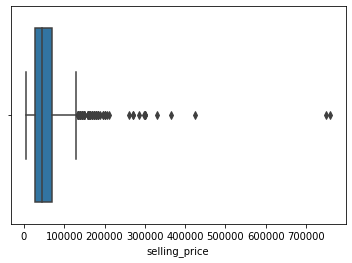

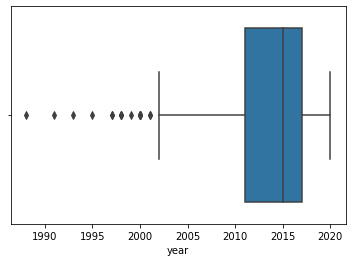

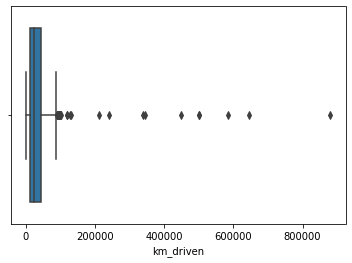

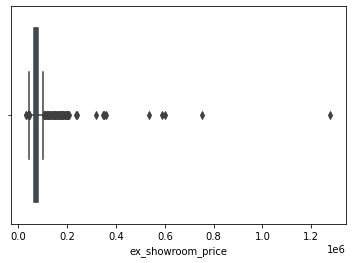

In [509]:
for i,col in enumerate(['selling_price', 'year','km_driven','ex_showroom_price']):
    plt.figure(i)
    sns.boxplot(df[col])

In [510]:
def removeOutlier(col):
    sorted(col)
    quant1,quant2=col.quantile([0.25,0.75])
    IQR=quant2-quant1
    lowerRange=quant1-(1.5*IQR)
    upperRange=quant2+(1.5*IQR)
    return lowerRange,upperRange


In [511]:
low,high=removeOutlier(df['selling_price'])
df[df['selling_price']<low].shape

(0, 7)

In [512]:
for col in ['selling_price','km_driven','ex_showroom_price']:
    low,high=removeOutlier(df[col])
    df[col]=np.where(df[col]>high,high,df[col])
    df[col]=np.where(df[col]<low,low,df[col])

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

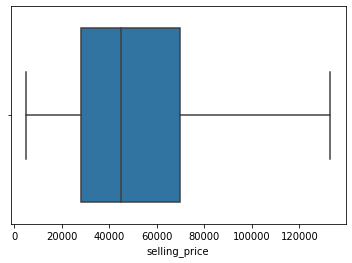

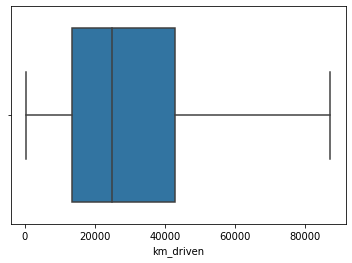

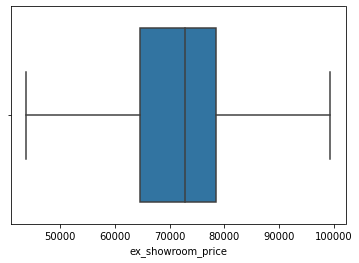

In [513]:
for i,col in enumerate(['selling_price','km_driven','ex_showroom_price']):
    plt.figure(i)
    sns.boxplot(df[col])

#### Encoding Categorical Features

In [514]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [515]:
len(df['name'].unique())

279

In [516]:
df['name']=df['name'].apply(lambda x:x.split()[0])

In [517]:
df['name'].unique()

array(['Royal', 'Honda', 'Yamaha', 'Hero', 'Bajaj', 'Jawa', 'Suzuki',
       'TVS', 'KTM', 'Mahindra', 'Aprilia', 'Vespa', 'UM',
       'Harley-Davidson', 'Kawasaki', 'BMW', 'Benelli', 'Yo', 'Hyosung',
       'Activa'], dtype=object)

In [518]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal,133000.0,2019,Individual,1st owner,350.0,72752.5
1,Honda,45000.0,2017,Individual,1st owner,5650.0,72752.5
2,Royal,133000.0,2018,Individual,1st owner,12000.0,99399.0
3,Yamaha,65000.0,2015,Individual,1st owner,23000.0,89643.0
4,Yamaha,20000.0,2011,Individual,2nd owner,21000.0,72752.5


In [519]:
df['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [520]:
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [521]:
df['Age']=2020-df['year']

In [522]:
df['Age']

0        1
1        3
2        2
3        5
4        9
        ..
1056    10
1057     8
1058     7
1059    11
1060    12
Name: Age, Length: 1061, dtype: int64

In [523]:
df.drop('year',axis=1,inplace=True)

In [524]:
df.head()

,name,selling_price,seller_type,owner,km_driven,ex_showroom_price,Age
0,Royal,133000.0,Individual,1st owner,350.0,72752.5,1
1,Honda,45000.0,Individual,1st owner,5650.0,72752.5,3
2,Royal,133000.0,Individual,1st owner,12000.0,99399.0,2
3,Yamaha,65000.0,Individual,1st owner,23000.0,89643.0,5
4,Yamaha,20000.0,Individual,2nd owner,21000.0,72752.5,9


In [525]:
df['owner']=df['owner'].apply(lambda x:int(x[0]))
df.head()

,name,selling_price,seller_type,owner,km_driven,ex_showroom_price,Age
0,Royal,133000.0,Individual,1,350.0,72752.5,1
1,Honda,45000.0,Individual,1,5650.0,72752.5,3
2,Royal,133000.0,Individual,1,12000.0,99399.0,2
3,Yamaha,65000.0,Individual,1,23000.0,89643.0,5
4,Yamaha,20000.0,Individual,2,21000.0,72752.5,9


In [526]:
len(df['name'].unique())

20

In [527]:
top_8_names=list(df['name'].value_counts().nlargest(8).index)
top_8_names

['Bajaj', 'Hero', 'Honda', 'Royal', 'Yamaha', 'TVS', 'Suzuki', 'KTM']

In [528]:
for name in top_8_names:
    df["name_"+name]=np.where(df["name"]==name,1,0)

In [529]:
df.head()

,name,selling_price,seller_type,owner,km_driven,ex_showroom_price,Age,name_Bajaj,name_Hero,name_Honda,name_Royal,name_Yamaha,name_TVS,name_Suzuki,name_KTM
0,Royal,133000.0,Individual,1,350.0,72752.5,1,0,0,0,1,0,0,0,0
1,Honda,45000.0,Individual,1,5650.0,72752.5,3,0,0,1,0,0,0,0,0
2,Royal,133000.0,Individual,1,12000.0,99399.0,2,0,0,0,1,0,0,0,0
3,Yamaha,65000.0,Individual,1,23000.0,89643.0,5,0,0,0,0,1,0,0,0
4,Yamaha,20000.0,Individual,2,21000.0,72752.5,9,0,0,0,0,1,0,0,0


In [530]:
df[df["name"]=="Mahindra"]

,name,selling_price,seller_type,owner,km_driven,ex_showroom_price,Age,name_Bajaj,name_Hero,name_Honda,name_Royal,name_Yamaha,name_TVS,name_Suzuki,name_KTM
70,Mahindra,133000.0,Individual,1,1933.0,99399.0,3,0,0,0,0,0,0,0,0
423,Mahindra,20000.0,Individual,1,7000.0,47343.0,7,0,0,0,0,0,0,0,0
457,Mahindra,22000.0,Individual,3,20000.0,44493.0,11,0,0,0,0,0,0,0,0
720,Mahindra,25000.0,Individual,1,13500.0,51185.0,4,0,0,0,0,0,0,0,0
824,Mahindra,30000.0,Individual,2,20000.0,51185.0,5,0,0,0,0,0,0,0,0
973,Mahindra,115000.0,Individual,1,35000.0,99399.0,2,0,0,0,0,0,0,0,0


In [531]:
df.drop("name",axis=1,inplace=True)

In [532]:
df['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

In [533]:
df['seller_type']=np.where(df['seller_type']=="Individual",1,0)

In [534]:
df['seller_type'].value_counts()

1    1055
0       6
Name: seller_type, dtype: int64

In [535]:
df.head()

,selling_price,seller_type,owner,km_driven,ex_showroom_price,Age,name_Bajaj,name_Hero,name_Honda,name_Royal,name_Yamaha,name_TVS,name_Suzuki,name_KTM
0,133000.0,1,1,350.0,72752.5,1,0,0,0,1,0,0,0,0
1,45000.0,1,1,5650.0,72752.5,3,0,0,1,0,0,0,0,0
2,133000.0,1,1,12000.0,99399.0,2,0,0,0,1,0,0,0,0
3,65000.0,1,1,23000.0,89643.0,5,0,0,0,0,1,0,0,0
4,20000.0,1,2,21000.0,72752.5,9,0,0,0,0,1,0,0,0


#### Feature Selection

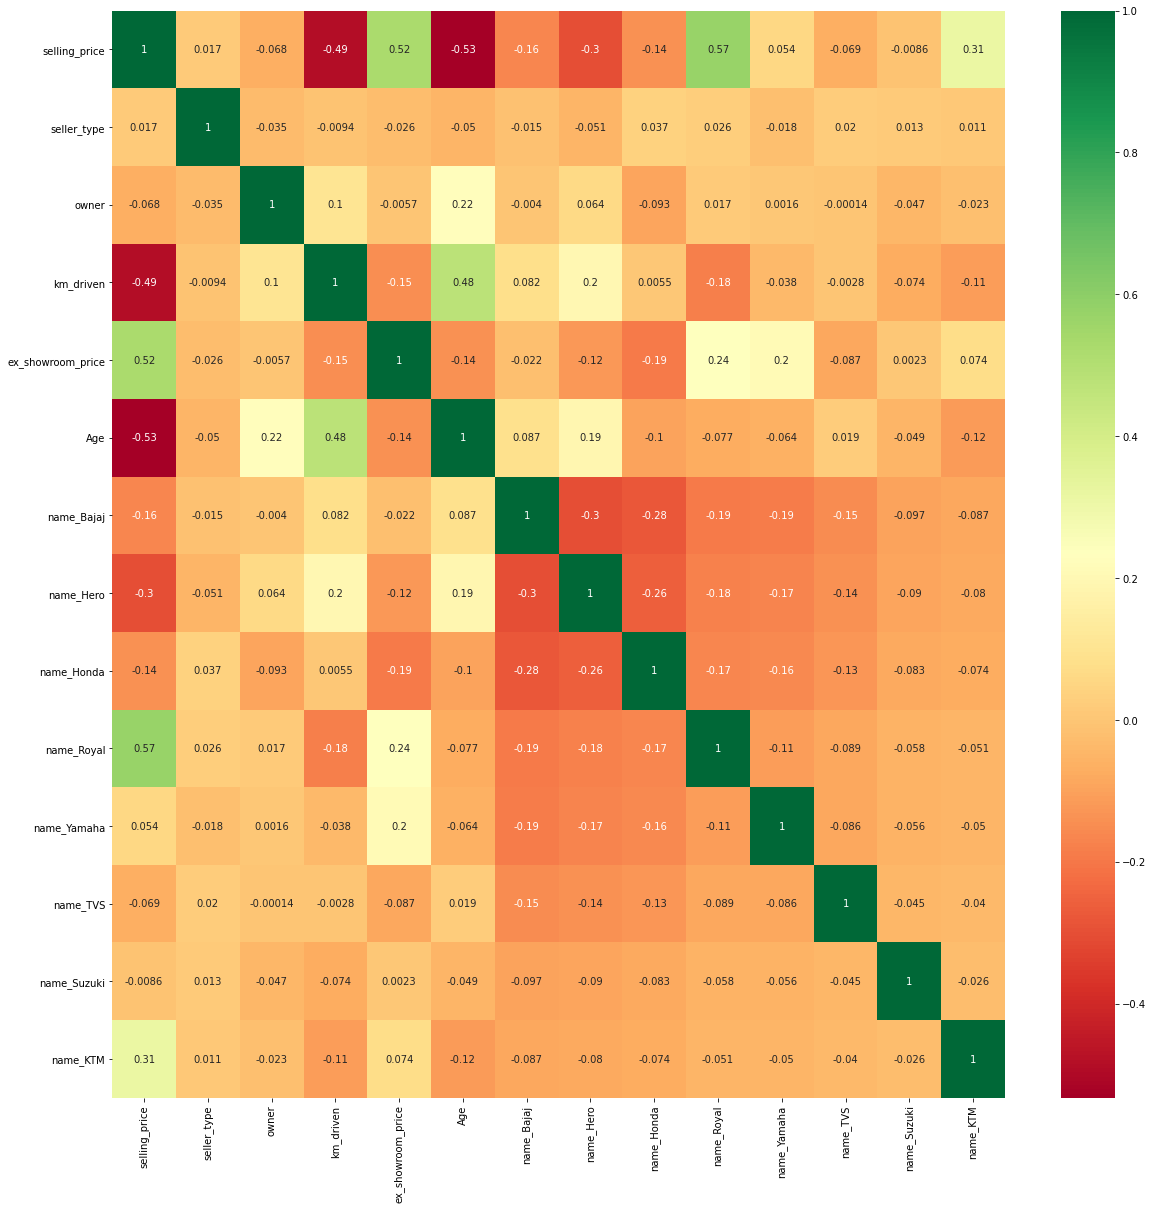

In [536]:
corrmat=df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) #plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Feature Scaling

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

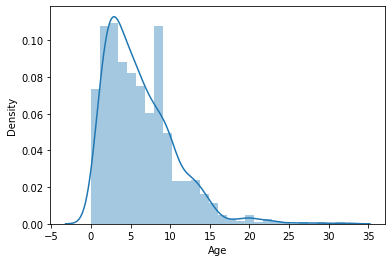

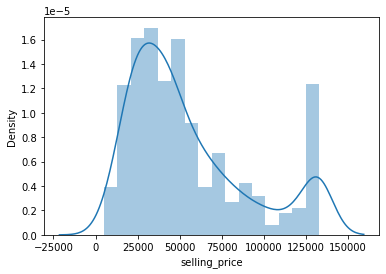

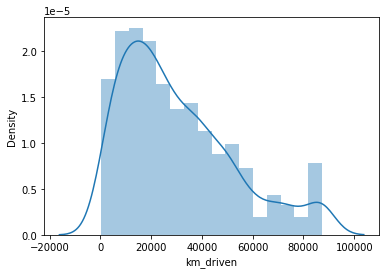

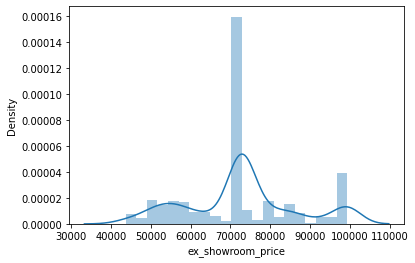

In [537]:
for i,col in enumerate(['Age','selling_price','km_driven','ex_showroom_price']):
    plt.figure(i)
    sns.distplot(df[col])

In [538]:
X=df.drop(['selling_price','seller_type'],axis=1)
y=df['selling_price']
X.head()

,owner,km_driven,ex_showroom_price,Age,name_Bajaj,name_Hero,name_Honda,name_Royal,name_Yamaha,name_TVS,name_Suzuki,name_KTM
0,1,350.0,72752.5,1,0,0,0,1,0,0,0,0
1,1,5650.0,72752.5,3,0,0,1,0,0,0,0,0
2,1,12000.0,99399.0,2,0,0,0,1,0,0,0,0
3,1,23000.0,89643.0,5,0,0,0,0,1,0,0,0
4,2,21000.0,72752.5,9,0,0,0,0,1,0,0,0


In [539]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [540]:
X.shape

(1061, 12)

In [541]:
df['seller_type'].value_counts()

1    1055
0       6
Name: seller_type, dtype: int64

In [542]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [543]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [544]:
rf=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='r2', n_iter = 10, cv =5, verbose=2, random_state=42, n_jobs = 1)


In [545]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=2)

In [546]:
print(rf_random.best_params_)
print(rf_random.best_score_)


{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}
0.8487493126663355


In [547]:
y_pred=rf_random.predict(X_test)

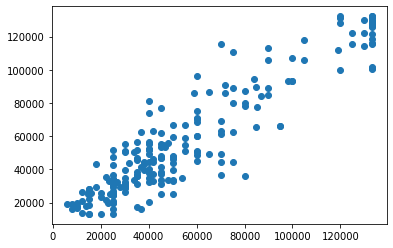

In [548]:
plt.scatter(y_test,y_pred)

In [549]:
rf_random.score(X_test,y_test)

0.8501640753856883

In [550]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 10504.72
Mean squared error = 195678724.12
Median absolute error = 8510.78
Explain variance score = 0.85
R2 score = 0.85


In [551]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)


In [552]:
X.head()

,owner,km_driven,ex_showroom_price,Age,name_Bajaj,name_Hero,name_Honda,name_Royal,name_Yamaha,name_TVS,name_Suzuki,name_KTM
0,1,350.0,72752.5,1,0,0,0,1,0,0,0,0
1,1,5650.0,72752.5,3,0,0,1,0,0,0,0,0
2,1,12000.0,99399.0,2,0,0,0,1,0,0,0,0
3,1,23000.0,89643.0,5,0,0,0,0,1,0,0,0
4,2,21000.0,72752.5,9,0,0,0,0,1,0,0,0


In [1]:
y.head()

NameError: name 'y' is not defined